In [1]:
import pandas as pd
from FuzzyTM import FLSA_W
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# import the data
path = '../Assignment-1/Dataset/assignment-2-data.csv'
df_cleaned = pd.read_csv(path)

df_cleaned['new_tokenized'] = df_cleaned['clean_content'].apply(lambda x: x.split())

df_cleaned

id ticker                                              title  \
0     221539    NIO  A Central Bank War Just Started And Its Good F...   
1     221547    NIO         6 Stocks To Watch  Nivida Could Be Falling   
2     221572    NIO  Stocks   Dow Drops Nearly 400 Points as Apple ...   
3     221597   UBER                     The Best Of CES 2020  Revised    
4     221614   UBER                               The Best Of CES 2020   
...      ...    ...                                                ...   
3098  442657    AMD    Here s Why Nvidia  NVDA  Stock Is Gaining Today   
3099  442682    AMD      4 Stocks To Watch Today  ATW  CWEI  MXL  SLCA   
3100  442705    AMD  Here s What The Buy Side Expects From AMD Thur...   
3101  442984      T  Zacks com Featured Highlights  AT T  Nu Skin E...   
3102  442987      T  5 Dividend Growth Stocks To Sail Through Uncer...   

     category                                            content release_date  \
0     opinion  ECB Effects\nThe move in the euro was huge  fa...   2019-03-07   
1     opinion  6 Stocks To Watch  March 6 Trading Session\nSt...   2019-03-06   
2        news  Investing com   A rout in Apple and Facebook  ...   2018-11-19   
3     opinion  With 4 500 companies bringing their innovation...   2020-01-16   
4     opinion  With 4 500 companies bringing their innovation...   2020-01-10   
...       ...                                                ...          ...   
3098  opinion  Shares of Nvidia   NASDAQ NVDA   are up nearly...   2016-09-27   
3099  opinion  It was a pretty good start to the week on Mond...   2016-05-17   
3100  opinion  Advanced Micro Devices Inc   NYSE AMD  is set ...   2014-04-17   
3101  opinion  For Immediate Release\n\nChicago  IL   July 22...   2016-07-21   
3102  opinion  With uncertainty ruling the markets since the ...   2016-07-20   

                       provider  \
0                Michael Kramer   
1                Michael Kramer   
2                 Investing.com   
3     Zacks Investment Research   
4     Zacks Investment Research   
...                         ...   
3098  Zacks Investment Research   
3099                Harry Boxer   
3100                   Estimize   
3101  Zacks Investment Research   
3102  Zacks Investment Research   

                                                    url  article_id  \
0     https://www.investing.com/analysis/a-central-b...   200395687   
1     https://www.investing.com/analysis/6-stocks-to...   200394931   
2     https://www.investing.com/news/stock-market-ne...     1694042   
3     https://www.investing.com/analysis/the-best-of...   200499164   
4     https://www.investing.com/analysis/the-best-of...   200498063   
...                                                 ...         ...   
3098  https://www.investing.com/analysis/here's-why-...   200155860   
3099  https://www.investing.com/analysis/atw,-cwei,-...   200130262   
3100  https://www.investing.com/analysis/here’s-what...      209915   
3101  https://www.investing.com/analysis/zacks.com-f...   200143537   
3102  https://www.investing.com/analysis/5-dividend-...   200143306   

            Date     Open    Close  \
0     2019-03-07  3.77750  3.73150   
1     2019-03-06  3.90400  3.80125   
2     2018-11-19  4.04475  3.61750   
3     2020-01-16  6.19300  6.22325   
4     2020-01-10  6.18325  6.10800   
...          ...      ...      ...   
3098  2016-09-27  1.60225  1.66350   
3099  2016-05-17  1.05000  1.05700   
3100  2014-04-17  0.46050  0.46400   
3101  2016-07-21  1.35250  1.33050   
3102  2016-07-20  1.34250  1.35550   

                                          clean_content  label  \
0     ecb effect move euro huge falling pip huge imp...      0   
1     stock watch march trading session stock stock ...      0   
2     investing com rout apple facebook nasdaq fb mo...      0   
3     company bringing innovation ce jan get really ...      1   
4     company bringing innovation ce jan get really ...      0   
...                  

In [3]:
input_file = df_cleaned['new_tokenized'].to_list()

In [4]:
flsaW = FLSA_W(input_file=input_file, num_topics=10, num_words=10)

print(flsaW.get_vocabulary_size())

pwgt,ptgd = flsaW.get_matrices()

flsaW.show_topics()

for topic in flsaW.show_topics(representation='words'):
  print(topic)

print(flsaW.get_coherence_score())
print(flsaW.get_diversity_score())
print(flsaW.get_interpretability_score())

29908
['composite', 'rose', 'reuters', 'chipmaker', 'mu', 'sporting', 'outperformance', 'hottest', 'combination', 'regular']
['alv', 'pcg', 'bmwyy', 'icera', 'otcpk', 'nwsa', 'trv', 'nsany', 'foo', 'chee']
['theory', 'podcast', 'human', 'century', 'mind', 'author', 'written', 'science', 'old', 'school']
['corporation', 'inc', 'gained', 'respectively', 'beat', 'robust', 'solution', 'holding', 'broader', 'investing']
['stephen', 'depend', 'jensen', 'shifted', 'biology', 'served', 'pile', 'regardless', 'becoming', 'friendly']
['book', 'evolution', 'richard', 'creativity', 'synthesis', 'inventing', 'certainty', 'feynman', 'professor', 'pretend']
['nvidia', 'nvda', 'hold', 'nyse', 'key', 'zacks', 'trade', 'rank', 'sector', 'past']
['ounce', 'unchanged', 'philadelphia', 'greenback', 'inbox', 'gainer', 'brent', 'amat', 'nov', 'caterpillar']
['premarket', 'troy', 'smh', 'randewich', 'noel', 'vlkay', 'cac', 'kemet', 'kem', 'unveils']
['gmt', 'outnumbered', 'settle', 'slumped', 'vaneck', 'adbe',

In [5]:
num_topics_grid = [2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150, 200, 250, 300, 500]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=2
Topics: [(0, '0.0003*"nasdaq" + 0.0003*"company" + 0.0003*"gmt" + 0.0003*"market" + 0.0003*"stock" + 0.0003*"share" + 0.0003*"also" + 0.0002*"year" + 0.0002*"new" + 0.0002*"nvda"'), (1, '0.0009*"nasdaq" + 0.0009*"nvda" + 0.0008*"nvidia" + 0.0008*"stock" + 0.0008*"company" + 0.0008*"share" + 0.0007*"market" + 0.0007*"top" + 0.0007*"buy" + 0.0007*"nyse"')]
Training FLSA model with num_topics=3
Topics: [(0, '0.0002*"company" + 0.0002*"nasdaq" + 0.0002*"premarket" + 0.0002*"market" + 0.0002*"also" + 0.0002*"stock" + 0.0002*"share" + 0.0002*"troy" + 0.0002*"new" + 0.0002*"year"'), (1, '0.0013*"nvda" + 0.0012*"nasdaq" + 0.0012*"nvidia" + 0.0012*"investing" + 0.0011*"corporation" + 0.0011*"com" + 0.0011*"inc" + 0.0011*"stock" + 0.001*"intc" + 0.001*"rank"'), (2, '0.0004*"traded" + 0.0004*"ounce" + 0.0004*"nasdaq" + 0.0004*"company" + 0.0004*"performer" + 0.0004*"market" + 0.0004*"stock" + 0.0004*"worst" + 0.0004*"unchanged" + 0.0004*"share"')]
Training FL

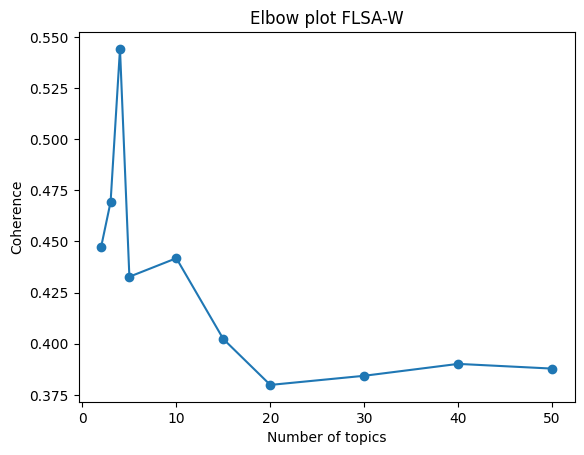

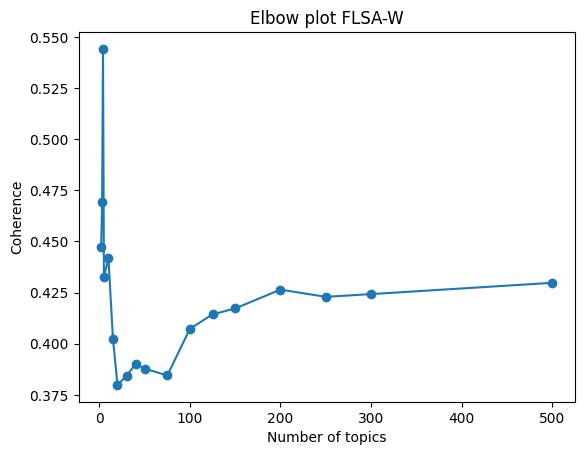

In [6]:
plt.plot(num_topics_grid[:10], coherence_scores[:10], marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

### Iteration 1

In [7]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4027757561157951
Test Diversity Score: 1.0
Test Interpretability Score: 0.4027757561157951
Topics: [(0, '0.012*"julian" + 0.0115*"epiphany" + 0.0105*"huxley" + 0.0099*"classroom" + 0.0096*"moccasin" + 0.0096*"dogma" + 0.0096*"intentional" + 0.0096*"nye" + 0.0096*"gitlin" + 0.0096*"debris"'), (1, '0.016*"act" + 0.0159*"co" + 0.0153*"speed" + 0.0152*"october" + 0.014*"develop" + 0.0137*"existing" + 0.0126*"volatility" + 0.0125*"monday" + 0.0119*"effect" + 0.0117*"private"'), (2, '0.0066*"boom" + 0.006*"slowed" + 0.0056*"ranging" + 0.0053*"challenging" + 0.0053*"pair" + 0.0053*"hence" + 0.0052*"airline" + 0.0051*"draw" + 0.0048*"staying" + 0.0046*"biotech"'), (3, '0.0195*"street" + 0.0194*"among" + 0.016*"advanced" + 0.0155*"rally" + 0.0142*"released" + 0.0135*"focused" + 0.0135*"later" + 0.0134*"behind" + 0.0132*"press" + 0.0121*"maker"'), (4, '0.0561*"two" + 0.0555*"nasdaq" + 0.047*"even" + 0.0463*"may" + 0.0445*"get" + 0.0409*"back" + 0.039*"technology" + 0.0365

### Iteration 2

In [8]:
number_pattern = re.compile(r'.*\d')

input_file = [[s for s in sublist if not number_pattern.match(s)] for sublist in input_file]

In [9]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.40736255844152147
Test Diversity Score: 0.999
Test Interpretability Score: 0.40695519588307993
Topics: [(0, '0.0513*"art" + 0.043*"roundup" + 0.026*"planet" + 0.0241*"death" + 0.019*"satya" + 0.0177*"culture" + 0.0171*"library" + 0.0136*"fascinating" + 0.0135*"broadening" + 0.0131*"elon"'), (1, '0.0283*"stephen" + 0.0265*"regardless" + 0.0242*"served" + 0.0237*"shifted" + 0.0188*"depend" + 0.018*"musk" + 0.0158*"scientific" + 0.015*"body" + 0.0138*"studying" + 0.0135*"fulfillment"'), (2, '0.0034*"randewich" + 0.0034*"noel" + 0.0023*"crest" + 0.0023*"rex" + 0.0022*"friedrichshafen" + 0.0022*"quadruple" + 0.002*"undertaking" + 0.002*"div" + 0.002*"staged" + 0.002*"shrugged"'), (3, '0.021*"russell" + 0.0151*"struck" + 0.0129*"occurred" + 0.0126*"engineering" + 0.0123*"surely" + 0.0122*"fantastic" + 0.0112*"false" + 0.0094*"pie" + 0.0093*"frontier" + 0.009*"realized"'), (4, '0.0364*"experience" + 0.0345*"simply" + 0.0326*"everything" + 0.0321*"involving" + 0.0268*"r

### Iteration 3a

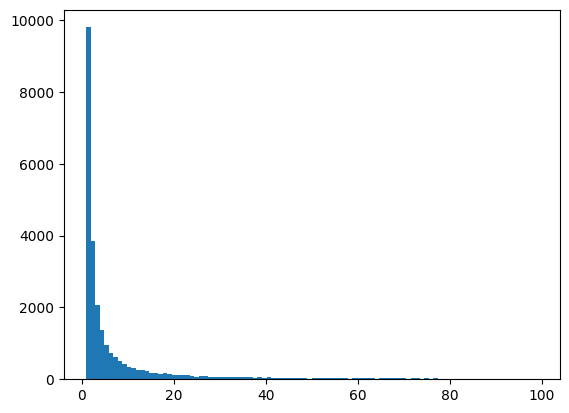

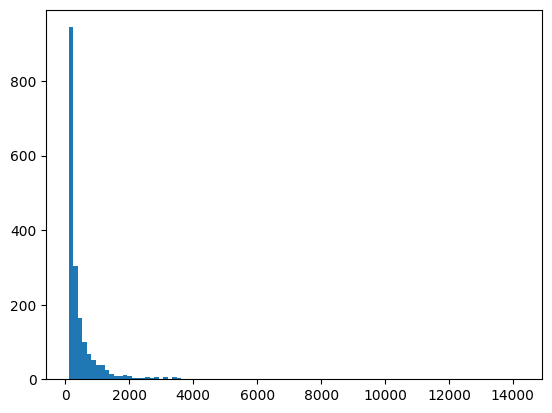

In [10]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

plt.hist(counts[counts<100], bins=100)
plt.show()

plt.hist(counts[counts>100], bins=100)
plt.show()

words_to_filter = words[(counts < 2) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [11]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0141*"cause" + 0.0106*"spread" + 0.0098*"death" + 0.0094*"population" + 0.0081*"severe" + 0.0074*"human" + 0.0072*"young" + 0.0072*"disease" + 0.0054*"originated" + 0.0051*"spanish"'), (1, '0.0023*"nvda" + 0.0021*"advanced" + 0.002*"reported" + 0.002*"released" + 0.002*"intc" + 0.002*"point" + 0.0019*"rank" + 0.0019*"among" + 0.0019*"hold" + 0.0018*"com"'), (2, '0.0007*"gmt" + 0.0005*"performer" + 0.0005*"outnumbered" + 0.0005*"slumped" + 0.0004*"uncover" + 0.0004*"advancing" + 0.0004*"vector" + 0.0004*"aug" + 0.0004*"dax" + 0.0004*"incorporated"'), (3, '0.0004*"premarket" + 0.0003*"troy" + 0.0003*"wedge" + 0.0003*"cite" + 0.0003*"smh" + 0.0003*"qrvo" + 0.0002*"vlkay" + 0.0002*"reiterates" + 0.0002*"randewich" + 0.0002*"noel"'), (4, '0.0011*"traded" + 0.001*"reuters" + 0.001*"composite" + 0.001*"rose" + 0.0009*"lowest" + 0.0009*"exchange" + 0.0009*"chipmaker" + 0.0008*"ltd" + 0.0008*"donald" + 0.0008*"bell"')]
Training FLSA model wi

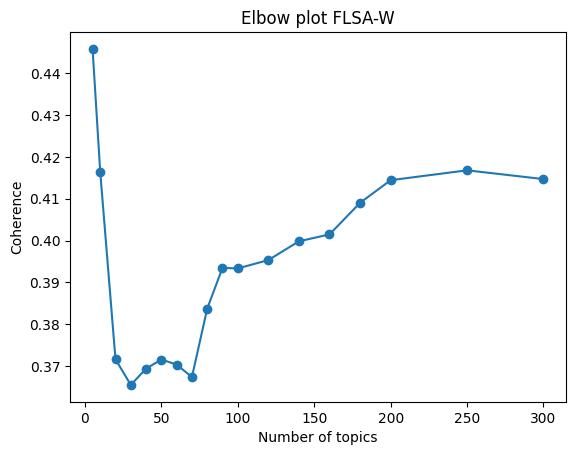

In [12]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [13]:
best_num_topics = 180

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4089864852658015
Test Diversity Score: 0.9922222222222222
Test Interpretability Score: 0.4058054792692897
Topics: [(0, '0.0188*"towards" + 0.0141*"astonishing" + 0.0114*"curb" + 0.0113*"scope" + 0.0113*"constantly" + 0.0102*"influence" + 0.0101*"grows" + 0.0096*"underlying" + 0.0092*"touched" + 0.009*"widespread"'), (1, '0.0076*"ipg" + 0.0065*"breakeven" + 0.0059*"pave" + 0.005*"riskier" + 0.0046*"linethe" + 0.0044*"unveils" + 0.0043*"seminar" + 0.0043*"cohort" + 0.0043*"commonplace" + 0.0043*"alleviate"'), (2, '0.0203*"ounce" + 0.0159*"weighed" + 0.0111*"capable" + 0.0107*"ftse" + 0.0101*"inbox" + 0.0099*"unchanged" + 0.0094*"pause" + 0.009*"dependence" + 0.0089*"lucrative" + 0.0088*"slew"'), (3, '0.0247*"signal" + 0.0226*"limited" + 0.0219*"account" + 0.0179*"appear" + 0.0176*"personal" + 0.0173*"gone" + 0.0172*"driving" + 0.0157*"uncertainty" + 0.0146*"car" + 0.0146*"held"'), (4, '0.0235*"stupor" + 0.0235*"luddite" + 0.0235*"ecology" + 0.0235*"tinker" + 0.022

### Iteration 3b

In [14]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [15]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0169*"expect" + 0.0157*"generation" + 0.0137*"gross" + 0.0136*"executive" + 0.0132*"margin" + 0.0131*"half" + 0.0128*"know" + 0.0127*"think" + 0.0126*"chief" + 0.0118*"president"'), (1, '0.0034*"compared" + 0.0034*"highest" + 0.0034*"graphic" + 0.0034*"basis" + 0.0034*"gpus" + 0.0033*"cash" + 0.0033*"non" + 0.0032*"expense" + 0.0032*"ago" + 0.0031*"segment"'), (2, '0.0006*"traded" + 0.0006*"performer" + 0.0005*"advancing" + 0.0005*"inbox" + 0.0005*"previously" + 0.0005*"unchanged" + 0.0005*"philadelphia" + 0.0005*"upbeat" + 0.0005*"basket" + 0.0005*"gainer"'), (3, '0.0017*"corporation" + 0.0015*"gained" + 0.0015*"com" + 0.0015*"nvda" + 0.0014*"corp" + 0.0014*"investing" + 0.0014*"session" + 0.0014*"intc" + 0.0013*"released" + 0.0013*"rank"'), (4, '0.0004*"premarket" + 0.0003*"troy" + 0.0003*"thomson" + 0.0003*"smh" + 0.0003*"implied" + 0.0003*"conclusively" + 0.0003*"mcqueeney" + 0.0003*"nvda" + 0.0002*"cite" + 0.0002*"soxx"')]
Trai

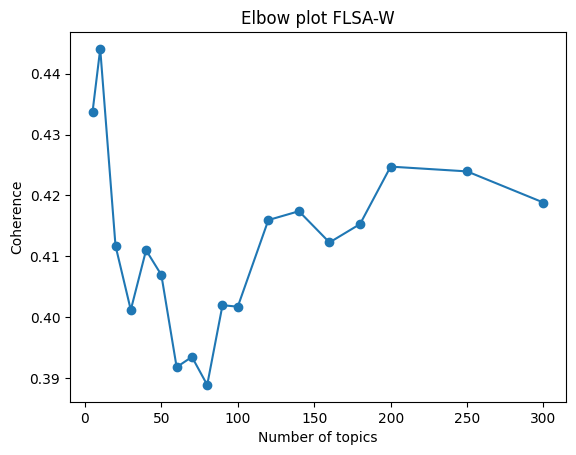

In [16]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [17]:
best_num_topics = 120

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.41238923989224907
Test Diversity Score: 0.9983333333333333
Test Interpretability Score: 0.41170192449242865
Topics: [(0, '0.0056*"otcpk" + 0.0046*"wbc" + 0.0041*"gelyy" + 0.0035*"kopin" + 0.0035*"kopn" + 0.0034*"ndls" + 0.0034*"loxo" + 0.0033*"bmwyy" + 0.0033*"topsline" + 0.0033*"mzor"'), (1, '0.0379*"design" + 0.0362*"positioned" + 0.0316*"efficiency" + 0.0269*"moment" + 0.0231*"series" + 0.0228*"easier" + 0.0193*"fully" + 0.0177*"stage" + 0.0162*"definitely" + 0.0132*"anticipated"'), (2, '0.0058*"vz" + 0.0041*"fedex" + 0.0037*"euphoria" + 0.0036*"mo" + 0.0035*"token" + 0.0035*"lienert" + 0.0035*"hospitality" + 0.0034*"underpin" + 0.0032*"frenzy" + 0.0031*"imposition"'), (3, '0.0123*"lon" + 0.0105*"tracking" + 0.0098*"delay" + 0.0095*"meant" + 0.0088*"robert" + 0.0084*"valued" + 0.0082*"controlled" + 0.0078*"save" + 0.0076*"print" + 0.0075*"citing"'), (4, '0.0127*"ppi" + 0.0108*"ism" + 0.0089*"classification" + 0.0083*"outbreak" + 0.0066*"downstream" + 0.0064*"

### Iteration 3c

In [18]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [19]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0173*"expect" + 0.0172*"generation" + 0.0144*"margin" + 0.0143*"executive" + 0.0142*"gross" + 0.0138*"half" + 0.0132*"know" + 0.0132*"think" + 0.013*"chief" + 0.0122*"server"'), (1, '0.0019*"corporation" + 0.0018*"nvda" + 0.0017*"com" + 0.0016*"investing" + 0.0016*"gained" + 0.0016*"intc" + 0.0016*"released" + 0.0015*"corp" + 0.0015*"rank" + 0.0015*"note"'), (2, '0.0037*"compared" + 0.0036*"basis" + 0.0035*"cash" + 0.0035*"gpus" + 0.0035*"ago" + 0.0034*"computing" + 0.0034*"non" + 0.0034*"graphic" + 0.0034*"segment" + 0.0034*"fourth"'), (3, '0.0005*"premarket" + 0.0003*"thomson" + 0.0003*"smh" + 0.0003*"gmt" + 0.0003*"avoided" + 0.0003*"strategiesit" + 0.0003*"conclusively" + 0.0003*"mcqueeney" + 0.0003*"soxx" + 0.0003*"ryan"'), (4, '0.0006*"previously" + 0.0006*"ltd" + 0.0006*"traded" + 0.0006*"amat" + 0.0006*"inbox" + 0.0006*"nov" + 0.0005*"ratio" + 0.0005*"reuters" + 0.0005*"cryptocurrency" + 0.0005*"applied"')]
Training FLSA mod

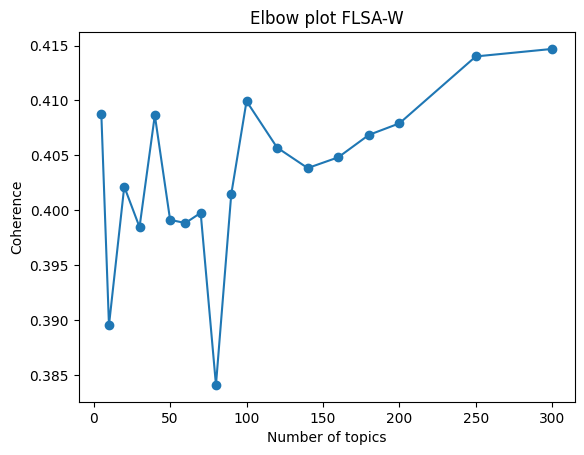

In [20]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [21]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.402292757001788
Test Diversity Score: 1.0
Test Interpretability Score: 0.402292757001788
Topics: [(0, '0.0357*"anticipated" + 0.026*"series" + 0.0257*"efficiency" + 0.0247*"gaining" + 0.0242*"room" + 0.0224*"began" + 0.0224*"design" + 0.0211*"ended" + 0.0209*"fully" + 0.0163*"easier"'), (1, '0.0184*"eur" + 0.0138*"gbp" + 0.0136*"zew" + 0.0136*"seng" + 0.0129*"rattling" + 0.0123*"et" + 0.0116*"troop" + 0.0111*"nzd" + 0.011*"norway" + 0.0108*"pboc"'), (2, '0.0057*"aig" + 0.0049*"southwestern" + 0.0044*"sd" + 0.0043*"oklahoma" + 0.0042*"fslr" + 0.0041*"hog" + 0.0041*"pct" + 0.0041*"angela" + 0.0041*"stxnews" + 0.004*"transitory"'), (3, '0.0282*"belief" + 0.0276*"driving" + 0.024*"prospect" + 0.021*"develop" + 0.0202*"carry" + 0.0188*"multiple" + 0.0184*"experience" + 0.0167*"expansion" + 0.0162*"concerned" + 0.015*"acquisition"'), (4, '0.0187*"successfully" + 0.0183*"portion" + 0.0175*"engaged" + 0.0172*"vega" + 0.0171*"achieved" + 0.0167*"except" + 0.0157*"ton" + 

### Iteration 3d

In [22]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 2) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [23]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0004*"troy" + 0.0004*"premarket" + 0.0004*"gmt" + 0.0002*"smh" + 0.0002*"implied" + 0.0002*"thomson" + 0.0002*"conclusively" + 0.0002*"cac" + 0.0002*"cite" + 0.0002*"considerhere"'), (1, '0.0135*"cause" + 0.011*"death" + 0.0109*"population" + 0.0092*"spread" + 0.0069*"severe" + 0.0063*"originated" + 0.0063*"spanish" + 0.006*"infected" + 0.0059*"young" + 0.0059*"syndrome"'), (2, '0.0016*"corporation" + 0.0015*"investing" + 0.0014*"gained" + 0.0014*"intc" + 0.0014*"broader" + 0.0014*"com" + 0.0013*"reported" + 0.0013*"advanced" + 0.0013*"released" + 0.0013*"beat"'), (3, '0.0007*"traded" + 0.0006*"ounce" + 0.0006*"worst" + 0.0005*"unchanged" + 0.0005*"brent" + 0.0005*"esp" + 0.0005*"gainer" + 0.0005*"percent" + 0.0005*"previously" + 0.0005*"uncover"'), (4, '0.005*"killing" + 0.0047*"known" + 0.0043*"treatment" + 0.0042*"article" + 0.0041*"developed" + 0.0041*"author" + 0.0041*"complex" + 0.004*"hot" + 0.0039*"eventually" + 0.0039*"euro

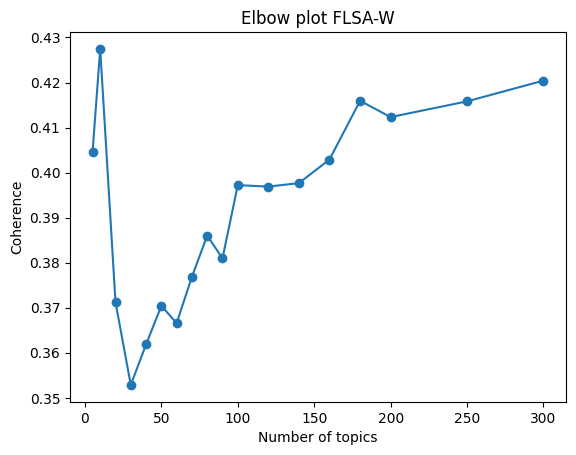

In [24]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [25]:
best_num_topics = 160

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.40416202630238074
Test Diversity Score: 0.999375
Test Interpretability Score: 0.40390942503594174
Topics: [(0, '0.0207*"weekly" + 0.0183*"giving" + 0.0156*"push" + 0.0147*"broker" + 0.0146*"willing" + 0.0143*"complete" + 0.0115*"needed" + 0.0115*"indicator" + 0.0113*"california" + 0.0112*"domestic"'), (1, '0.0608*"economic" + 0.06*"development" + 0.0467*"power" + 0.0398*"let" + 0.0245*"googl" + 0.0219*"latest" + 0.0214*"level" + 0.0188*"saw" + 0.0171*"country" + 0.0167*"five"'), (2, '0.0488*"compared" + 0.0427*"fourth" + 0.0405*"basis" + 0.0395*"cash" + 0.0339*"flow" + 0.0301*"significantly" + 0.0264*"enterprise" + 0.0208*"client" + 0.0202*"increasing" + 0.0199*"live"'), (3, '0.0211*"filled" + 0.0189*"statistic" + 0.0173*"frontier" + 0.0144*"owning" + 0.014*"served" + 0.0133*"cooperation" + 0.0128*"knew" + 0.0127*"presented" + 0.0123*"machinery" + 0.0114*"depend"'), (4, '0.0228*"falling" + 0.0186*"electric" + 0.0184*"fell" + 0.0175*"pointed" + 0.0168*"manufactur

### Iteration 3e

In [26]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [27]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0005*"premarket" + 0.0004*"troy" + 0.0003*"thomson" + 0.0003*"smh" + 0.0003*"implied" + 0.0003*"gmt" + 0.0003*"conclusively" + 0.0003*"mcqueeney" + 0.0003*"soxx" + 0.0003*"considerhere"'), (1, '0.0038*"highest" + 0.0037*"graphic" + 0.0037*"compared" + 0.0036*"gpus" + 0.0036*"cash" + 0.0036*"basis" + 0.0035*"non" + 0.0034*"expense" + 0.0034*"expanding" + 0.0034*"ago"'), (2, '0.0016*"corporation" + 0.0015*"gained" + 0.0015*"com" + 0.0015*"corp" + 0.0014*"session" + 0.0013*"investing" + 0.0013*"intc" + 0.0012*"released" + 0.0012*"read" + 0.0012*"holding"'), (3, '0.0181*"expect" + 0.0164*"generation" + 0.0146*"gross" + 0.0144*"executive" + 0.014*"half" + 0.0136*"know" + 0.0135*"margin" + 0.0135*"think" + 0.0135*"chief" + 0.0129*"president"'), (4, '0.0006*"traded" + 0.0006*"performer" + 0.0005*"unchanged" + 0.0005*"advancing" + 0.0005*"inbox" + 0.0005*"gainer" + 0.0005*"philadelphia" + 0.0005*"upbeat" + 0.0005*"worst" + 0.0005*"basket"')

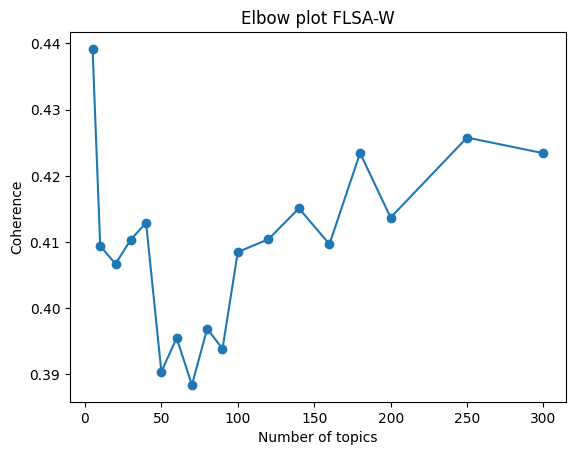

In [28]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [29]:
best_num_topics = 120

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4112075521259364
Test Diversity Score: 0.9975
Test Interpretability Score: 0.41017953324562156
Topics: [(0, '0.0467*"jefferies" + 0.0417*"moore" + 0.0313*"ramped" + 0.0306*"journey" + 0.0302*"projecting" + 0.0275*"workload" + 0.0247*"nicely" + 0.0216*"transcript" + 0.0206*"approximately" + 0.02*"seven"'), (1, '0.0049*"alv" + 0.0033*"acad" + 0.0031*"tsx" + 0.0029*"bynd" + 0.0029*"chery" + 0.0028*"nsany" + 0.0028*"sebastian" + 0.0028*"autoliv" + 0.0026*"ustream" + 0.0026*"cerner"'), (2, '0.0564*"move" + 0.0539*"future" + 0.0447*"likely" + 0.04*"deal" + 0.0344*"change" + 0.0328*"keep" + 0.0311*"aapl" + 0.0289*"view" + 0.0278*"global" + 0.0277*"purpose"'), (3, '0.0257*"worst" + 0.0222*"percent" + 0.0155*"selloff" + 0.0145*"recession" + 0.011*"grab" + 0.0108*"replace" + 0.0101*"reasonable" + 0.0099*"dji" + 0.0092*"rolling" + 0.0086*"parallel"'), (4, '0.0065*"levy" + 0.006*"insurer" + 0.0051*"ascending" + 0.0047*"referring" + 0.0043*"jeffrey" + 0.0042*"cac" + 0.0042*"

### Iteration 3f

In [30]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [31]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0041*"graphic" + 0.0041*"cash" + 0.004*"gpus" + 0.004*"fourth" + 0.0039*"basis" + 0.0039*"non" + 0.0039*"ago" + 0.0039*"compared" + 0.0039*"expanding" + 0.0038*"segment"'), (1, '0.0019*"corporation" + 0.0017*"com" + 0.0016*"gained" + 0.0016*"investing" + 0.0016*"corp" + 0.0016*"intc" + 0.0015*"released" + 0.0014*"rising" + 0.0014*"beat" + 0.0014*"note"'), (2, '0.0005*"premarket" + 0.0004*"gmt" + 0.0004*"thomson" + 0.0004*"troy" + 0.0003*"smh" + 0.0003*"implied" + 0.0003*"avoided" + 0.0003*"strategiesit" + 0.0003*"conclusively" + 0.0003*"soxx"'), (3, '0.0006*"traded" + 0.0006*"previously" + 0.0006*"ltd" + 0.0006*"amat" + 0.0006*"inbox" + 0.0006*"ratio" + 0.0005*"nov" + 0.0005*"cryptocurrency" + 0.0005*"applied" + 0.0005*"proven"'), (4, '0.019*"expect" + 0.0183*"generation" + 0.0156*"executive" + 0.0156*"gross" + 0.015*"half" + 0.0146*"margin" + 0.0146*"know" + 0.0144*"think" + 0.0143*"chief" + 0.0133*"president"')]
Training FLSA mode

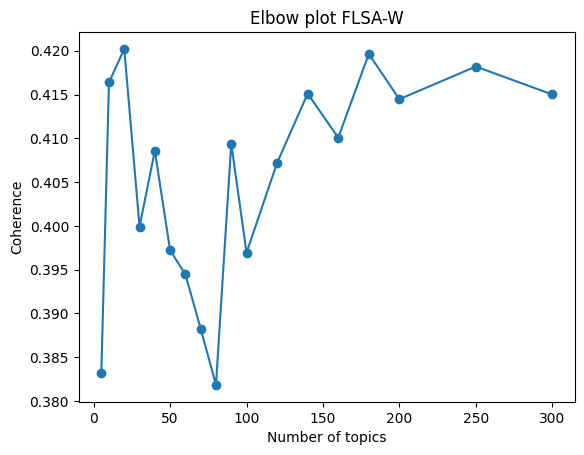

In [32]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [33]:
best_num_topics = 140

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.411103624778456
Test Diversity Score: 0.9942857142857143
Test Interpretability Score: 0.40875446120829345
Topics: [(0, '0.0228*"act" + 0.0216*"bought" + 0.0209*"role" + 0.0197*"home" + 0.0197*"considered" + 0.019*"social" + 0.0177*"employee" + 0.0169*"co" + 0.0158*"us" + 0.015*"hour"'), (1, '0.0655*"win" + 0.0615*"net" + 0.0575*"sheet" + 0.0439*"credit" + 0.0384*"rest" + 0.0361*"flow" + 0.0305*"america" + 0.0248*"non" + 0.021*"cash" + 0.0192*"quick"'), (2, '0.0175*"remarkable" + 0.0171*"ev" + 0.0171*"instrument" + 0.0165*"reader" + 0.0159*"capitalize" + 0.0158*"taiwan" + 0.0148*"cryptocurrency" + 0.0148*"played" + 0.0134*"tune" + 0.0106*"engineer"'), (3, '0.0159*"conclusively" + 0.0139*"snp" + 0.0118*"nellis" + 0.0096*"payc" + 0.0095*"gamer" + 0.009*"collaborated" + 0.0084*"domain" + 0.0083*"marred" + 0.0083*"agx" + 0.0081*"phenomenal"'), (4, '0.0872*"excluding" + 0.0463*"partially" + 0.0451*"originally" + 0.0445*"prepared" + 0.0247*"remark" + 0.0219*"thin" + 0.

### Iteration 3g

In [34]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 2) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [35]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0004*"wedge" + 0.0003*"premarket" + 0.0003*"reiterates" + 0.0003*"qrvo" + 0.0003*"xsd" + 0.0003*"aftermarket" + 0.0003*"cy" + 0.0003*"alv" + 0.0003*"randewich" + 0.0003*"noel"'), (1, '0.0009*"ounce" + 0.0008*"unchanged" + 0.0008*"philadelphia" + 0.0007*"towards" + 0.0007*"gainer" + 0.0007*"brent" + 0.0007*"inbox" + 0.0007*"bidu" + 0.0007*"amat" + 0.0007*"greenback"'), (2, '0.0026*"investing" + 0.0024*"read" + 0.0024*"released" + 0.0023*"believe" + 0.0023*"four" + 0.0022*"rising" + 0.0022*"broader" + 0.0022*"stand" + 0.0022*"intc" + 0.0021*"rally"'), (3, '0.0014*"reuters" + 0.0014*"composite" + 0.0014*"exchange" + 0.0012*"chipmaker" + 0.0012*"hottest" + 0.0012*"jones" + 0.0011*"york" + 0.0011*"sporting" + 0.0011*"outperformance" + 0.0011*"session"'), (4, '0.0009*"gmt" + 0.0006*"outnumbered" + 0.0005*"troy" + 0.0005*"advancer" + 0.0004*"vaneck" + 0.0004*"decliners" + 0.0004*"strategiesit" + 0.0004*"jinping" + 0.0004*"implied" + 0.0004

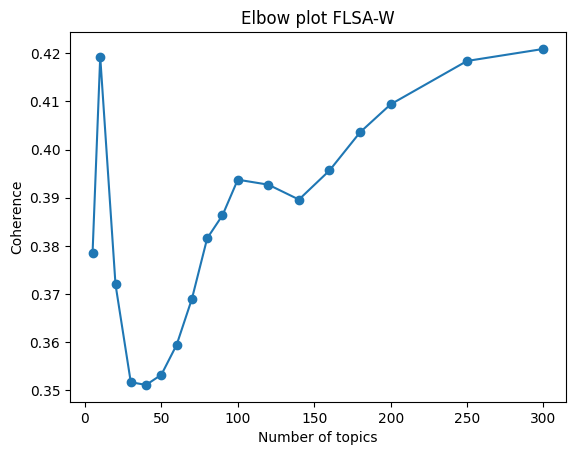

In [36]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [37]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.38239890387042147
Test Diversity Score: 1.0
Test Interpretability Score: 0.38239890387042147
Topics: [(0, '0.0144*"autonomous" + 0.013*"tension" + 0.0127*"mu" + 0.0115*"received" + 0.011*"failed" + 0.0106*"insider" + 0.0092*"mere" + 0.0082*"handle" + 0.008*"francisco" + 0.0076*"engine"'), (1, '0.0069*"performer" + 0.0058*"rsi" + 0.0058*"vector" + 0.0056*"intermediate" + 0.005*"comfortably" + 0.0049*"baker" + 0.0048*"favored" + 0.0046*"coupled" + 0.0046*"wholesale" + 0.0045*"mrk"'), (2, '0.003*"alv" + 0.0025*"rescued" + 0.0021*"deliveroo" + 0.0021*"abiomed" + 0.0021*"atif" + 0.0021*"oswego" + 0.002*"fngu" + 0.0019*"bynd" + 0.0019*"occupy" + 0.0019*"impeachment"'), (3, '0.0113*"conquered" + 0.011*"democratize" + 0.0103*"beast" + 0.0096*"farming" + 0.0085*"receptor" + 0.0073*"worthy" + 0.0073*"enduring" + 0.0067*"unforeseen" + 0.0063*"franklin" + 0.0062*"ayx"'), (4, '0.0417*"fast" + 0.0383*"analysis" + 0.0303*"progress" + 0.0296*"building" + 0.0261*"innovation" + 0

### Iteration 3h

In [38]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [39]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0006*"traded" + 0.0006*"unchanged" + 0.0006*"ounce" + 0.0006*"worst" + 0.0006*"gainer" + 0.0005*"advancing" + 0.0005*"performer" + 0.0005*"inbox" + 0.0005*"philadelphia" + 0.0005*"upbeat"'), (1, '0.0045*"highest" + 0.0042*"gpus" + 0.004*"fourth" + 0.0039*"expanding" + 0.0038*"primarily" + 0.0038*"expense" + 0.0037*"gpu" + 0.0036*"prior" + 0.0035*"significant" + 0.0035*"flow"'), (2, '0.02*"expect" + 0.0178*"generation" + 0.0162*"gross" + 0.016*"executive" + 0.0154*"half" + 0.015*"know" + 0.015*"chief" + 0.0148*"think" + 0.0146*"president" + 0.0136*"question"'), (3, '0.0014*"session" + 0.0013*"intc" + 0.0013*"investing" + 0.0012*"respectively" + 0.0012*"released" + 0.0012*"holding" + 0.0012*"read" + 0.0012*"meanwhile" + 0.0012*"boost" + 0.0012*"united"'), (4, '0.0005*"premarket" + 0.0004*"troy" + 0.0004*"gmt" + 0.0003*"implied" + 0.0003*"thomson" + 0.0003*"smh" + 0.0003*"conclusively" + 0.0003*"considerhere" + 0.0003*"delve" + 0.0003*

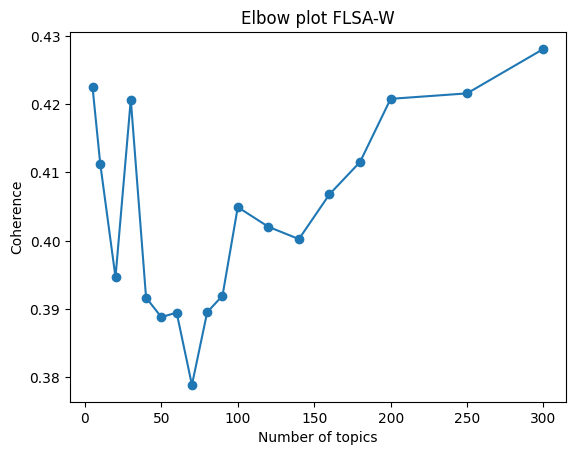

In [40]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [41]:
best_num_topics = 180

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4111188975642981
Test Diversity Score: 0.9905555555555555
Test Interpretability Score: 0.4072361079761908
Topics: [(0, '0.0664*"benefit" + 0.0623*"turn" + 0.0557*"competition" + 0.0487*"addition" + 0.042*"supply" + 0.0383*"believe" + 0.0358*"machine" + 0.0355*"add" + 0.0339*"always" + 0.0242*"anything"'), (1, '0.0212*"inbox" + 0.0144*"meaningful" + 0.0106*"managing" + 0.0102*"gearing" + 0.0099*"wider" + 0.0099*"eric" + 0.0098*"albeit" + 0.0096*"knew" + 0.0096*"influence" + 0.0086*"seat"'), (2, '0.0055*"cong" + 0.0054*"nem" + 0.0053*"aet" + 0.005*"conducting" + 0.0045*"relate" + 0.0044*"transporting" + 0.0042*"crafting" + 0.0042*"fleeing" + 0.004*"suburban" + 0.004*"shedding"'), (3, '0.0453*"meanwhile" + 0.0267*"transaction" + 0.0245*"enough" + 0.0231*"reportedly" + 0.0229*"list" + 0.0224*"instead" + 0.0224*"reflect" + 0.022*"recommendation" + 0.0213*"store" + 0.0193*"face"'), (4, '0.02*"jan" + 0.0193*"delivery" + 0.018*"opened" + 0.0177*"financials" + 0.0169*"so

### Iteration 3i

In [42]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [43]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0214*"expect" + 0.02*"generation" + 0.0176*"executive" + 0.0175*"gross" + 0.0169*"half" + 0.0165*"know" + 0.0163*"chief" + 0.0162*"think" + 0.0156*"president" + 0.015*"question"'), (1, '0.005*"fourth" + 0.0048*"gpus" + 0.0047*"expanding" + 0.0045*"primarily" + 0.0044*"gpu" + 0.0043*"highest" + 0.0042*"prior" + 0.0042*"expense" + 0.0042*"sachs" + 0.0041*"significant"'), (2, '0.0006*"premarket" + 0.0005*"troy" + 0.0005*"gmt" + 0.0004*"thomson" + 0.0004*"implied" + 0.0004*"avoided" + 0.0004*"smh" + 0.0004*"conclusively" + 0.0004*"strategiesit" + 0.0003*"soxx"'), (3, '0.0016*"session" + 0.0015*"intc" + 0.0015*"investing" + 0.0015*"respectively" + 0.0014*"released" + 0.0014*"surged" + 0.0014*"rising" + 0.0014*"lost" + 0.0014*"boost" + 0.0014*"read"'), (4, '0.0007*"traded" + 0.0006*"previously" + 0.0006*"amat" + 0.0006*"inbox" + 0.0006*"nov" + 0.0006*"ratio" + 0.0006*"ltd" + 0.0006*"philadelphia" + 0.0005*"proven" + 0.0005*"matras"')]
Tra

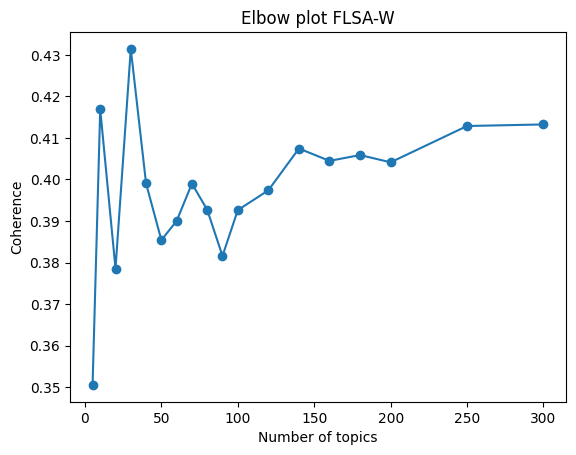

In [44]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [45]:
best_num_topics = 140

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4030830800955305
Test Diversity Score: 0.9964285714285714
Test Interpretability Score: 0.4016434976666179
Topics: [(0, '0.0419*"coverage" + 0.0377*"represent" + 0.0336*"slide" + 0.0267*"feeling" + 0.0239*"saving" + 0.0233*"perfect" + 0.0223*"adjusted" + 0.0209*"santa" + 0.0188*"pro" + 0.0183*"traction"'), (1, '0.023*"surged" + 0.0211*"estimated" + 0.0182*"fundamental" + 0.0177*"surprising" + 0.0161*"kevin" + 0.0151*"quality" + 0.0146*"developing" + 0.0135*"practice" + 0.0135*"soared" + 0.0127*"anyone"'), (2, '0.0218*"exchange" + 0.0189*"cutting" + 0.0162*"remained" + 0.0149*"auto" + 0.0148*"function" + 0.0137*"approach" + 0.0127*"extend" + 0.0117*"climb" + 0.0108*"medical" + 0.0104*"watched"'), (3, '0.034*"audio" + 0.0312*"weighted" + 0.0296*"luck" + 0.0223*"lay" + 0.0206*"strip" + 0.0187*"reviewed" + 0.0162*"optimize" + 0.0153*"watt" + 0.0133*"marketable" + 0.0132*"headquarters"'), (4, '0.1135*"strength" + 0.1027*"significant" + 0.0636*"unit" + 0.063*"talk" + 0

### Iteration 4

In [46]:
words_to_filter = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

input_file = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

In [47]:
best_num_topics = 40

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics, num_words=20)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.46206987871871
Test Diversity Score: 0.99875
Test Interpretability Score: 0.46149229137031167
Topics: [(0, '0.0065*"traded" + 0.0043*"worst" + 0.0041*"remarkable" + 0.0041*"proven" + 0.004*"matras" + 0.0038*"elsewhere" + 0.0036*"lon" + 0.0036*"taiwan" + 0.0035*"suggesting" + 0.0035*"downturn" + 0.0034*"develops" + 0.0034*"spdr" + 0.0034*"instrument" + 0.0033*"cat" + 0.0032*"suffered" + 0.0032*"boeing" + 0.0032*"citing" + 0.0032*"ev" + 0.0032*"delivering" + 0.0031*"heading"'), (1, '0.0112*"corporation" + 0.0082*"robust" + 0.0069*"respectively" + 0.0066*"solution" + 0.0065*"massive" + 0.0064*"target" + 0.0064*"holding" + 0.0063*"measure" + 0.0062*"agreement" + 0.0062*"followed" + 0.0062*"driver" + 0.006*"gained" + 0.0059*"displayed" + 0.0058*"raised" + 0.0058*"consisting" + 0.0058*"hypothetical" + 0.0058*"acquisition" + 0.0058*"account" + 0.0057*"rebalanced" + 0.0057*"informational"'), (2, '0.0065*"corp" + 0.0064*"poised" + 0.0062*"attention" + 0.0061*"produce" + 